In [5]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [6]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
print(df.shape)
df.head()

(77536, 8)


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [7]:
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [8]:
 # check for imbalance
df.loan_status.value_counts()
# Feature selection
# correlation analysis
corrs = df.corr()
corrs

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
loan_size,1.000000,0.999905,0.999893,0.951847,0.988507,0.840407,0.999893,0.758846
interest_rate,0.999905,1.000000,0.999994,0.951938,0.988515,0.840596,0.999994,0.758900
borrower_income,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
debt_to_income,0.951847,0.951938,0.951950,1.000000,0.941078,0.825668,0.951950,0.589305
num_of_accounts,0.988507,0.988515,0.988509,0.941078,1.000000,0.818320,0.988509,0.749802
derogatory_marks,0.840407,0.840596,0.840577,0.825668,0.818320,1.000000,0.840577,0.553187
total_debt,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
loan_status,0.758846,0.758900,0.758890,0.589305,0.749802,0.553187,0.758890,1.000000


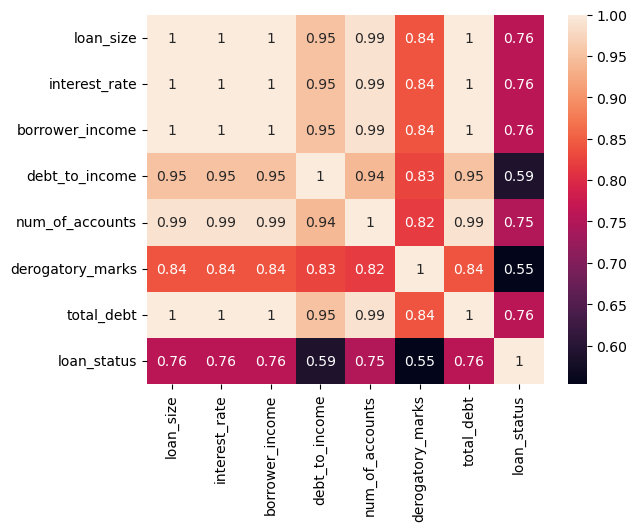

In [9]:
sns.heatmap(corrs, annot=True)
plt.show()

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [10]:
# Separate the y variable, the labels
y = df['loan_status']

# Separate the X variable, the features
features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
            'num_of_accounts', 'derogatory_marks', 'total_debt']
X = df[features].copy()


In [11]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [14]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [15]:
# Import the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame with the 'loan_status' as the label column
X = df.drop(columns='loan_status')  # Features
y = df['loan_status']  # Labels

# Split the data using train_test_split with a random_state of 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Output the shapes to verify the split
print(f"Training feature data shape: {X_train.shape}")
print(f"Testing feature data shape: {X_test.shape}")
print(f"Training labels data shape: {y_train.shape}")
print(f"Testing labels data shape: {y_test.shape}")


Training feature data shape: (62028, 7)
Testing feature data shape: (15508, 7)
Training labels data shape: (62028,)
Testing labels data shape: (15508,)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [19]:
# Import the LogisticRegression module from sklearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model with a random_state parameter of 1
model = LogisticRegression(random_state=1)

# Fit the model using the training data
model.fit(X_train, y_train)


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [23]:
# Make predictions using the testing data
y_pred = model.predict(X_test)

test_preds = model.predict(X_test)
test_proba = model.predict_proba(X_test)[:, 1]


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

Confusion Matrix: 
    [[14924    77]
 [   31   476]]


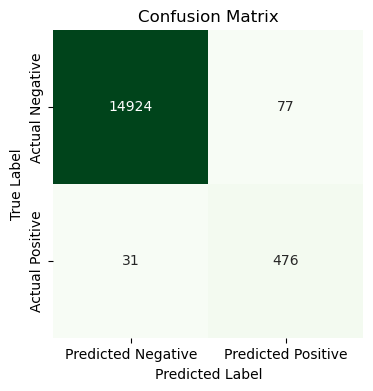

In [24]:
# Generate a confusion matrix for the model
test_cf = confusion_matrix(y_test, test_preds)

print(f"""Confusion Matrix: 
    {test_cf}""")

# Confusion Matrix with greens
plt.figure(figsize=(4, 4))
sns.heatmap(test_cf, annot=True, fmt='d', cmap='Greens', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [25]:
# Import classification_report from sklearn
from sklearn.metrics import classification_report

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)

# Output the classification report
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.86      0.94      0.90       507

    accuracy                           0.99     15508
   macro avg       0.93      0.97      0.95     15508
weighted avg       0.99      0.99      0.99     15508



AUC: 0.99


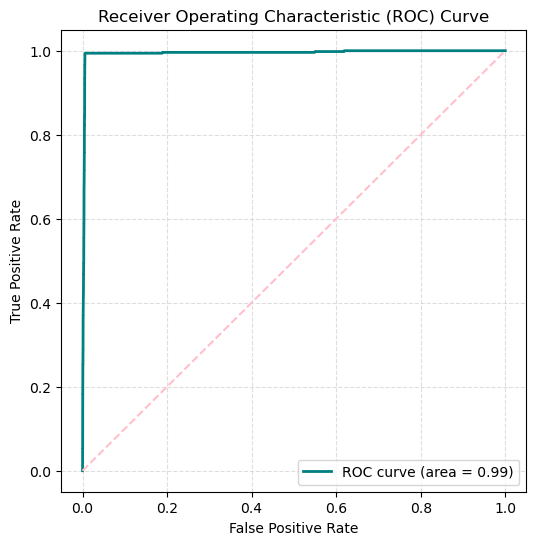

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate AUC
test_auc = roc_auc_score(y_test, test_proba)
print(f"AUC: {test_auc:.2f}")

# Calculate ROC Curve
fpr, tpr, _ = roc_curve(y_test, test_proba)

# Set figure size
plt.figure(figsize=(6, 6))

# Plot the ROC curve with teal color
plt.plot(fpr, tpr, color='teal', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

# Plot the diagonal reference line with pink color
plt.plot([0, 1], [0, 1], color='pink', linestyle='--')

# Titles and labels
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add grid and legend
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.legend(loc="lower right")

# Display the plot
plt.show()


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:**The logistic regression model performs extremely well in predicting both the 0 (healthy loan) and 1 (high-risk loan) labels, with high accuracy across all metrics.

For healthy loans (label 0):

Precision: 1.00, meaning that the model predicted all healthy loans with no false positives.
Recall: 0.99, indicating that the model correctly identified 99% of the healthy loans.
F1-score: 1.00, reflecting a perfect balance between precision and recall.
For high-risk loans (label 1):

Precision: 0.86, which means that 86% of loans predicted as high-risk were actually high-risk.
Recall: 0.94, meaning that the model correctly identified 94% of the actual high-risk loans.
F1-score: 0.90, which indicates a good balance between precision and recall, though there is some room for improvement in precision.
Overall accuracy: The model achieves an excellent accuracy of 99%, which means it correctly classifies the vast majority of the loans in the dataset.

Conclusion:
The model predicts healthy loans almost perfectly, but for high-risk loans, the model shows a slightly lower precision. This could be due to the imbalanced dataset, where healthy loans significantly outnumber high-risk loans. Still, the model is highly effective, especially considering the strong recall for high-risk loans. 

---